### Umama Ahmed 
  
 **Data Visualization Project**
 
--- 
## <u><center>Exploratory Data Analysis: Suicide Rates Overview 1985 to 2015 </center></u>

### Introduction

* This dataset contains data from 100+ countries on the topic of suicide and mental health infrastructure.  
* It was created by extracting the latest data from WHO and combining it into a single dataset.
* Attributes available range from Country, Sex, year, hdi for year, generation and population and finally Suicide Rate (amount of suicides per 100k people).
* This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different states of United States. (kaggle dataset)

### Objective

* The suicide rate in lots of countries have been quite high for many years, including the developing and developed countries. 
* Analyze the suicide rate of sex, the age groups and generation and plot the rank of suicide rate.
* Understand the distribution of the suicide rate by using Python, ggplot, numpy, pandas, plotnine, seaborn and other tools by performing Exploratory Data Analysis (EDA). 
* Analyze the key factors of high suicide rate.

### Insight Extraction using Data Visualization:

1) *Data Preprocessing*  
2) *Data Understanding*  
3) *Data Cleaning*  
4) *Explaining, Exploring, Analyzing*  
5) *Exploratory data analysis*  
6) *Insight Visualization*  

In [1]:
# To perform mathematical operations on data(arrays)
import numpy as np

# To perform data analysis
import pandas as pd

# For data visualization and graphical plotting
import matplotlib.pyplot as plt
%matplotlib inline
import plotnine
from plotnine import *

# For visualizing missing values
import missingno as msno
%matplotlib inline
from matplotlib.axis import Axis
import seaborn as sns

# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')

### Reading Data 

In [2]:
# Loading database 'master_dataset'
df_masters = pd.read_csv(r'D:\Education\Masters\6) DV (Data Visualization)\project\master.csv')

In [3]:
df_masters

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


### <u>Data Understanding</u>

In [4]:
# Descriptive statistics for all numeric columns in 'master' dataset
df_masters.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Key Aspects 

Data visualization chiefly helps in 3 key aspects of reports and statements: 
   * _Explaining_ : When you attempt to explain something through data visualization, you start with a question,   
    1) Compares information with suicide rates by year and country    
    2) Analysis of Gender Differences in Suicide Rates  
    
    
   * _Exploring_: identifying an area of interest, asking questions, exploring, and finding several solutions or answers.
    
    
   * _Analyzing_: Other visuals prompt viewers to inspect, distill, and transform the most significant information in a data set so that they can discover something new or predict upcoming situations. 

### <u>No of attributes & No of data points in the dataset</u>

In [5]:
# Number of rows & columns in dataset:
print('Number of data points: ' + str(df_masters.shape[0]))
print('Number of attributes: ' + str(df_masters.shape[1]))

Number of data points: 27820
Number of attributes: 12


### <u>Type of the attributes in the dataset (numerical, string, etc):</u>

In [6]:
# Data Type of the attributes in the dataset
df_masters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### <u>No of missing values if any in each attribute of the dataset:</u>

In [7]:
print('Total Missing Values: ', df_masters.isnull().values.sum())
print('\nNo of missing values in each attribute of the dataset: ')
df_masters.isnull().sum()

Total Missing Values:  19456

No of missing values in each attribute of the dataset: 


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

### <u>View Of Dataset:</u>

In [8]:
df_masters.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### <u> Summary Of Data Understanding: </u>

In [9]:
print('Total Number of countries: ', df_masters.country.nunique())
print('Total Number of suicides: ', df_masters.suicides_no.sum())
print('Number of different generations: ', df_masters.generation.nunique())
print('Total Number of age groups: ', df_masters.age.nunique())
print('\nDifferent generations:\n', df_masters.generation.value_counts())
print('\nAge groups: ', df_masters.age.unique())

Total Number of countries:  101
Total Number of suicides:  6748420
Number of different generations:  6
Total Number of age groups:  6

Different generations:
 Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

Age groups:  ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


_The World Health Organization estimates that approximately 1 million people die each year
from suicide. To those who are not in the grips of suicidal depression and despair, it’s difficult
to understand what drives so many individuals to take their own lives. But a suicidal person is
in so much pain that they can see no other option._
_To analyze and help suicide prevention, we want to find out the insights of suicide rate that at
which country there is a high rate of suicide, also how gdp impacts suicide rate._

In this suicide dataset, you will see different generation values indicating the born year. Roughly speaking, the generation means:

* G.I. Generation - born between 1901 - 1927
* Silent - born between 1925 - 1942
* Boomers - born between 1946 - 1964
* Generation X - born between 1960 - 1980
* Millennials - born between 1980 - early 2000
* Generation Z - born between mid-1990 - 2000s

### <u> Data Cleaning & Preparation </u>

In [ ]:
# Prerequisite for importing libraries
# Downloading Python packages

!conda install --yes missingno
!conda install --yes geoplotlib
!conda install --yes plotnine
!conda install --yes pydotplus

### Directory of Visualizations
There are mainly 6 types of visualization:
1) Amount  
2) Distribution  
3) Proportion  
4) x-y relationship  
5) Geospatial Data  
6) Uncertainty  

### <u> Visualization of Missing Values </u>

<AxesSubplot:>

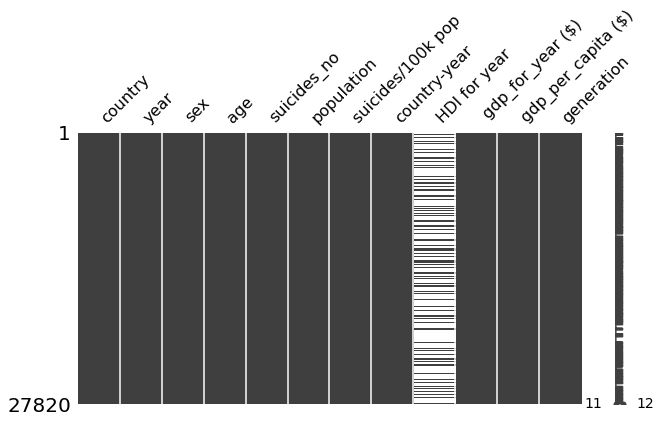

In [10]:
msno.matrix(df_masters, figsize=(10, 5))

<AxesSubplot:>

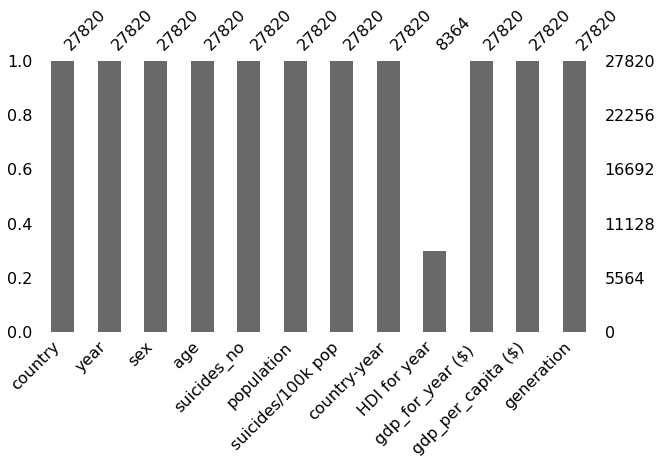

In [11]:
msno.bar(df_masters, figsize=(10, 5))

### <u> Handling of missing values: </u>
_As we already know that the missing data is only in one column that tells Human Development Index for a given year.
Therefore, it is removed. Moreover, it does not provide any significant information to be used for further analysis of data._

In [12]:
df_masters.drop('HDI for year', axis = 1, inplace = True)

### <u> Feature selection </u>
    Removing column 'country-year' as it is of no use because two seperate columns of 'country' and 'year' already exists providing same information.

In [13]:
df_masters.drop('country-year', axis='columns', inplace=True)

In [14]:
# Final dataset view
df_masters

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


## <center> Exploratory Data Analysis </center>

### <u> How much data each year has: </u>

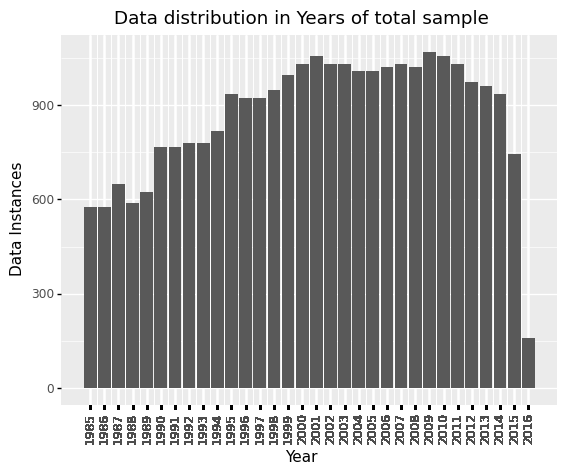

<ggplot: (151267245502)>

In [15]:
ggplot(df_masters, aes(x='year')) + geom_bar(stat = 'count') + \
xlab('Year') + ylab('Data Instances') + \
theme(axis_text_x=plotnine.element_text(rotation=90)) + \
ggtitle('Data distribution in Years of total sample') + \
    scale_x_continuous(breaks=list(df_masters['year']),
                              labels=list(df_masters['year']))

### <u> How much data each generation has </u>

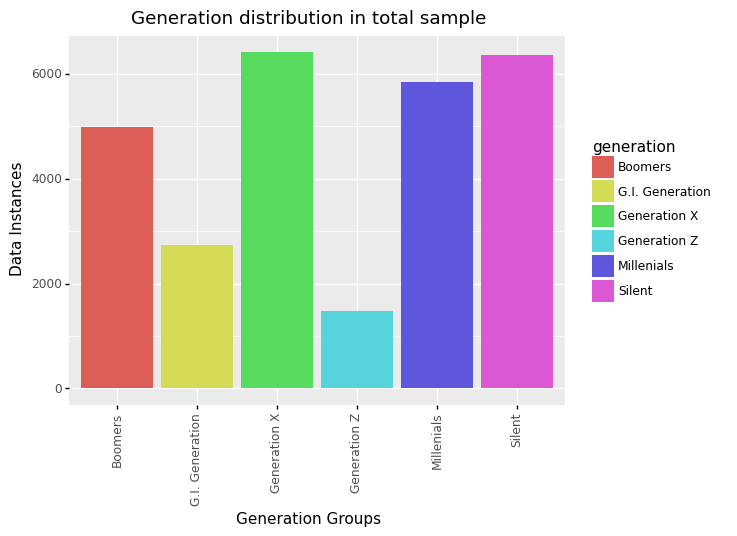

<ggplot: (151333815215)>

In [16]:
ggplot(df_masters, aes(x='generation', fill='generation')) + geom_bar() + \
xlab('Generation Groups') + ylab('Data Instances') + \
ggtitle('Generation distribution in total sample') + \
theme(axis_text_x=plotnine.element_text(rotation=90))

### <u> How much data each age group has</u>

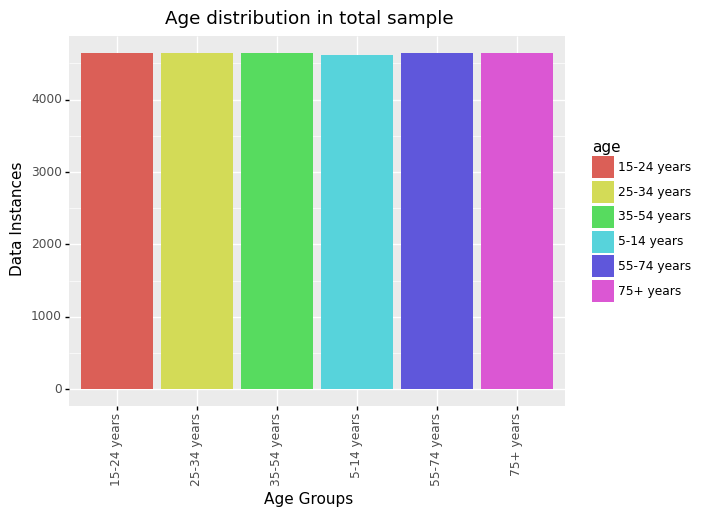

<ggplot: (151330621693)>

In [17]:
ggplot(df_masters, aes(x='age', fill='age')) + geom_bar() + \
xlab('Age Groups') + ylab('Data Instances') + \
ggtitle('Age distribution in total sample') + \
theme(axis_text_x=plotnine.element_text(rotation=90))

### <u> How much data each gender has </u>

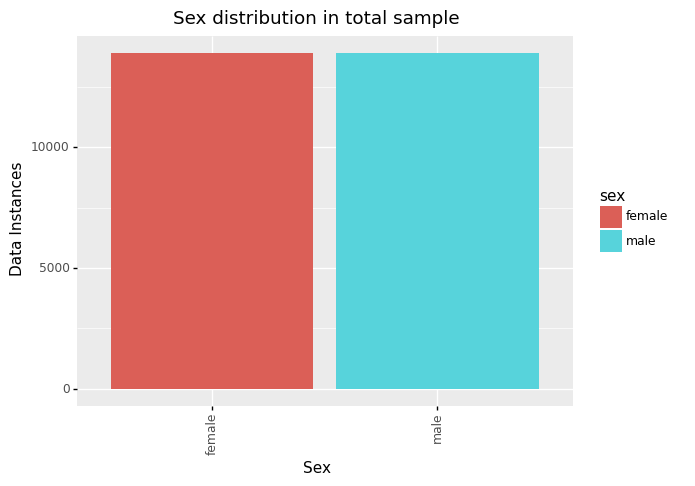

<ggplot: (151330621498)>

In [18]:
ggplot(df_masters, aes(x='sex', fill='sex')) + geom_bar() + \
xlab('Sex') + ylab('Data Instances') + \
ggtitle('Sex distribution in total sample') + \
theme(axis_text_x=plotnine.element_text(rotation=90))

### <u> How much data each country has </u>

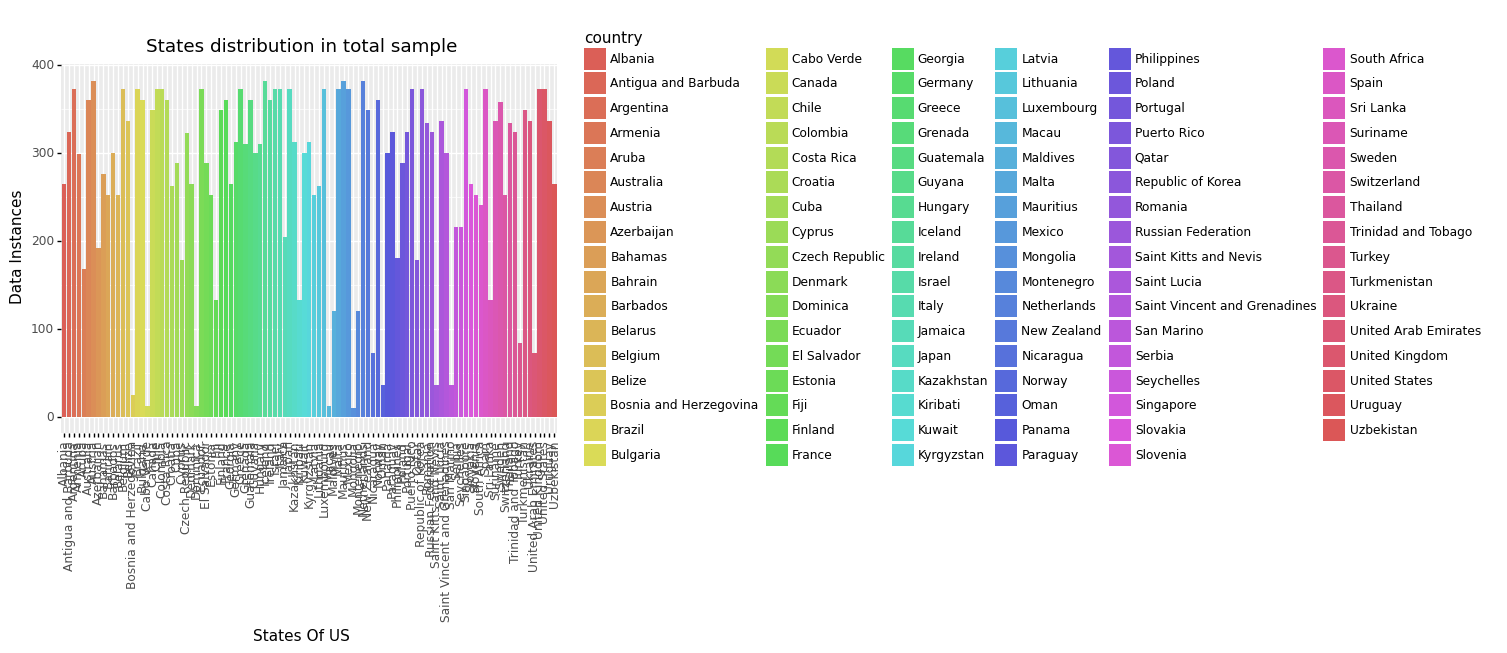

<ggplot: (151333814655)>

In [19]:
ggplot(df_masters, aes(x='country', fill='country')) + geom_bar() + \
xlab('States Of US') + ylab('Data Instances') + \
ggtitle('States distribution in total sample') + \
theme(axis_text_x=plotnine.element_text(rotation=90))

### <u> Unique values in states of US: </u>

State number of unique values: 101


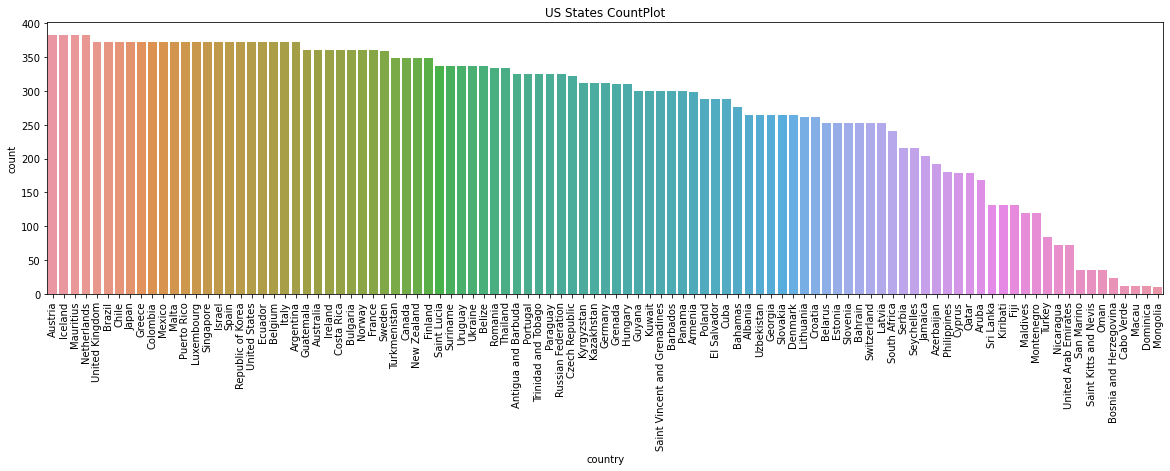

In [20]:
print(f"State number of unique values: {df_masters['country'].nunique()}")

plt.figure(figsize=(20, 5))
sns.countplot(df_masters['country'], order=df_masters['country'].value_counts().index)
plt.title("US States CountPlot")
plt.xticks(rotation=90)
plt.show()

### <u> Which year has highest suicide rate </u>

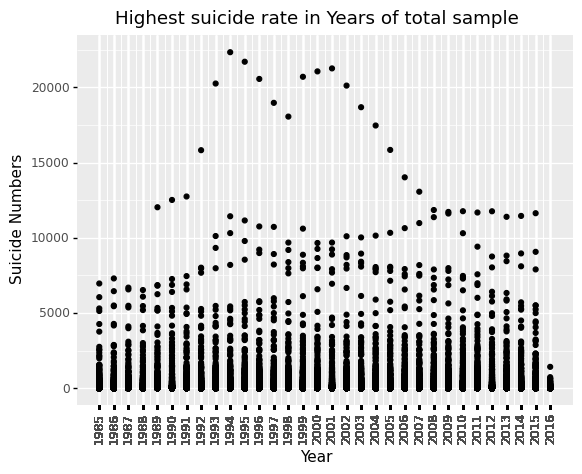

<ggplot: (151333760711)>

In [21]:
plotnine.qplot(x='year', y='suicides_no', data=df_masters)+ \
xlab('Year') + ylab('Suicide Numbers') + \
theme(axis_text_x=plotnine.element_text(rotation=90)) + \
ggtitle('Highest suicide rate in Years of total sample') + \
    scale_x_continuous(breaks=list(df_masters['year']),
                              labels=list(df_masters['year']))

### <u> Which generation has highest number of suicide rate </u>

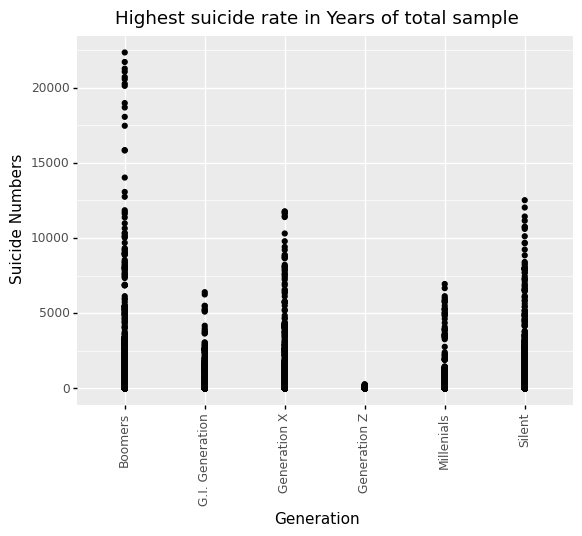

<ggplot: (151334971799)>

In [22]:
plotnine.qplot(x='generation', y='suicides_no', data=df_masters)+ \
xlab('Generation') + ylab('Suicide Numbers') + \
theme(axis_text_x=plotnine.element_text(rotation=90)) + \
ggtitle('Highest suicide rate in Years of total sample')

### <u> Which age group has highest number of suicide rate </u>

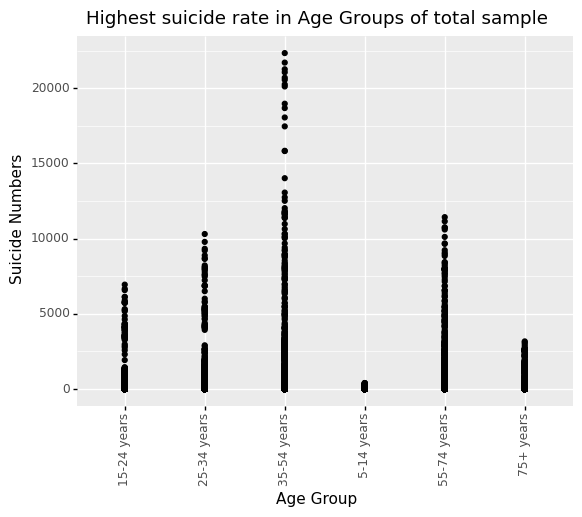

<ggplot: (151325075408)>

In [23]:
plotnine.qplot(x='age', y='suicides_no', data=df_masters)+ \
xlab('Age Group') + ylab('Suicide Numbers') + \
theme(axis_text_x=plotnine.element_text(rotation=90)) + \
ggtitle('Highest suicide rate in Age Groups of total sample')

### <u> Which gender has highest number of suicide rate </u>

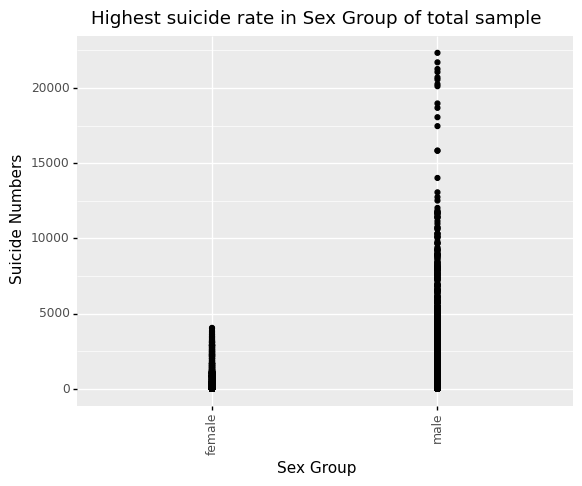

<ggplot: (151325104381)>

In [24]:
plotnine.qplot(x='sex', y='suicides_no', data=df_masters)+ \
xlab('Sex Group') + ylab('Suicide Numbers') + \
theme(axis_text_x=plotnine.element_text(rotation=90)) + \
ggtitle('Highest suicide rate in Sex Group of total sample')

### <u> Which country has highest number of suicide rate </u>

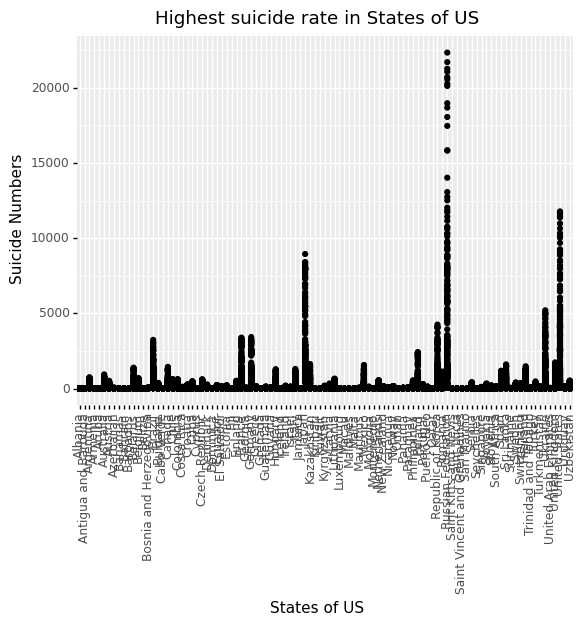

<ggplot: (151325110544)>

In [25]:
plotnine.qplot(x='country', y='suicides_no', data=df_masters)+ \
xlab('States of US') + ylab('Suicide Numbers') + \
theme(axis_text_x=plotnine.element_text(rotation=90)) + \
ggtitle('Highest suicide rate in States of US')

## <center> <u> Pre-attentive in Graphs </u> </center>

### <u> Differences between the suicide rates of different generations over the years: </u>

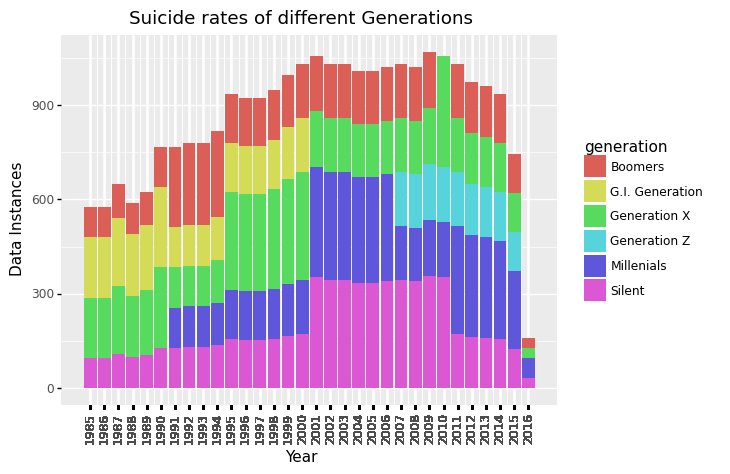

<ggplot: (151324559439)>

In [26]:
ggplot(df_masters, aes(x=('year') , fill = 'generation')) + \
    geom_bar(stat='count') + \
    xlab('Year') + ylab('Data Instances') + \
    ggtitle('Suicide rates of different Generations') + \
    theme(axis_text_x=plotnine.element_text(rotation=90)) + \
    scale_x_continuous(breaks=list(df_masters['year']),
                              labels=list(df_masters['year']))

### <u> Differences between the suicide rates of different age groups over the years: </u>

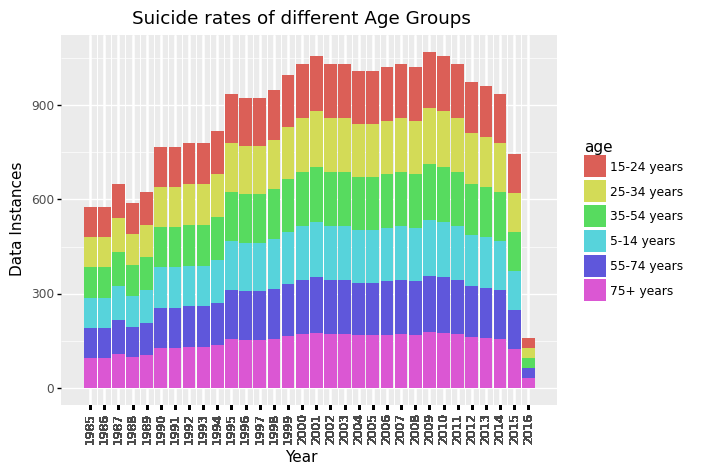

<ggplot: (151326740956)>

In [37]:
ggplot(df_masters, aes(x=('year') , fill = 'age')) + \
    geom_bar(stat='count') + \
    xlab('Year') + ylab('Data Instances') + \
    ggtitle('Suicide rates of different Age Groups') + \
    theme(axis_text_x=plotnine.element_text(rotation=90)) + \
    scale_x_continuous(breaks=list(df_masters['year']),
                              labels=list(df_masters['year']))

### <u> Differences between the female and male suicide rates over rhe years: </u>

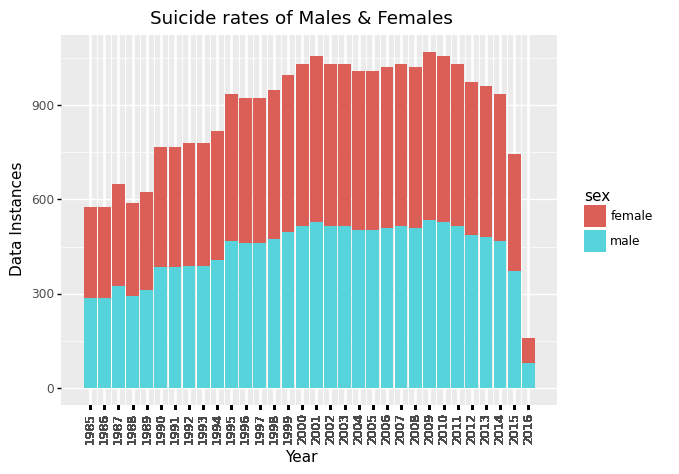

<ggplot: (151306111422)>

In [38]:
ggplot(df_masters, aes(x=('year') , fill = 'sex')) + \
    geom_bar(stat='count') + \
    xlab('Year') + ylab('Data Instances') + \
    ggtitle('Suicide rates of Males & Females') + \
    theme(axis_text_x=plotnine.element_text(rotation=90)) + \
    scale_x_continuous(breaks=list(df_masters['year']),
                              labels=list(df_masters['year']))

### Observation:

* Before further analysis, we know that the year _2016_ has the minimum data & the year _2009_ has the maximum data as compared to all the years. If we talk about Generations then _Generation Z_ has the minimum data & _Generation X_ has the maximum data. Whereas, the age and sex is equally distributed all over the data.
* The _1994_ year, _Boomers_ generation, Age group of _35-54_ and mostly _Males_ has the highest suicide rate in last ten years.

### <u> Correlation of Suicide Rates: </u>

In [39]:
df_masters.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.001785
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,1.000000


<AxesSubplot:>

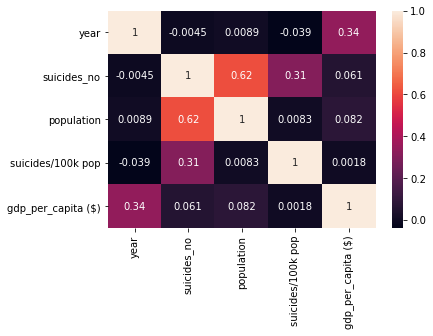

In [40]:
sns.heatmap(df_masters.corr(),annot=True)

* We can see that _year_ and _year_ got the number 1.000000, which makes sense, each column always has a perfect relationship with itself.
* _suicides_no_ and _population_ got a 0.616162 correlation, which is a good correlation, and that's obvious as the population increases the Number of suicides will also be increase.

## <center> Visualization Formats </center>
There are may types of visualization graphs. For example;
* Line Graph
* Bar Chart
* Box Plot
* Density Plot
* Scatter Plot
* Bubble Chart

### <u> Suicide Incidence Over the Years </u>

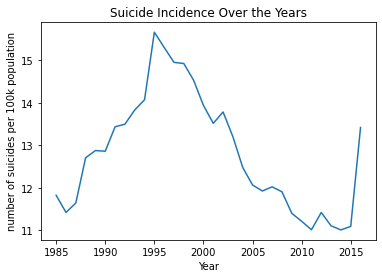

In [41]:
x = np.arange(1985, 2017)

# y-axis is the mean suicide no. per 100k population
y = df_masters.groupby('year')['suicides/100k pop'].mean()

# Create a line plot
sns.lineplot(x=x, y=y)
plt.xlabel('Year')
plt.ylabel('number of suicides per 100k population')
plt.title('Suicide Incidence Over the Years');

* The suicide incidence of the countries in our dataset peaked in 1995 and followed a downtrend since then. 
* However, in 2015, there was a sudden surge of number of suicides.

### <u> Suicide Incidence by Age and Gender (1985 - 2016): </u>

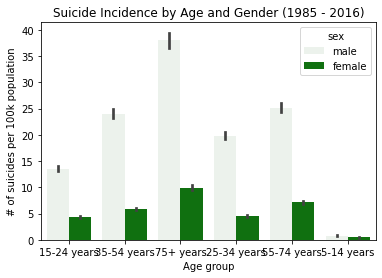

In [42]:
sns.barplot(data=df_masters, x='age', y='suicides/100k pop', hue='sex',color="green")
plt.xlabel('Age group')
plt.ylabel('# of suicides per 100k population')
plt.title('Suicide Incidence by Age and Gender (1985 - 2016)');

### <u> Checking for Outliers: </u>

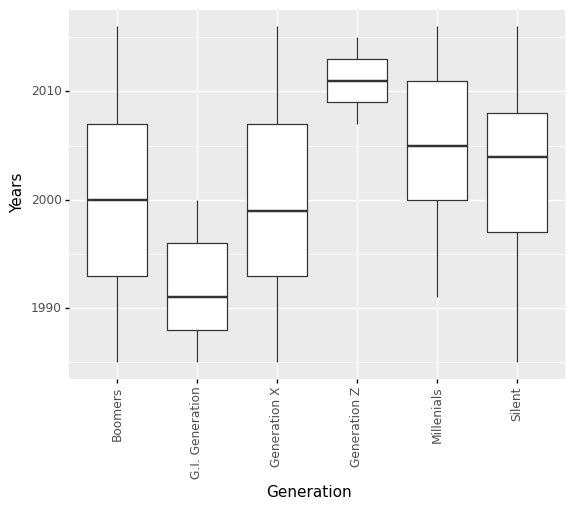

<ggplot: (151324482771)>

In [43]:
ggplot(df_masters, aes("generation", "year")) + geom_boxplot() + \
xlab('Generation') + ylab('Years') + \
theme(axis_text_x=plotnine.element_text(rotation=90))

### Global suicide_per_100k Average:

(array([11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

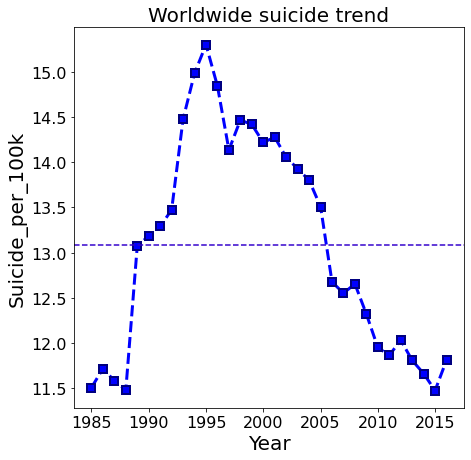

In [44]:
# Understanding the Global suicide Trend
global_suicide_per_100k_trend = pd.DataFrame((df_masters.groupby(['year'])['suicides_no'].sum()/df_masters.groupby(['year'])['population'].sum())*100000)
global_suicide_per_100k_trend.columns = ['global_suicide_per_100k']

# Global suicide_per_100k average
global_suicide_per_100k_average = global_suicide_per_100k_trend.mean()
plt.figure(figsize=(7,7))
plt.plot(global_suicide_per_100k_trend.index, global_suicide_per_100k_trend,marker='s',c='b',ls='--',lw=3,ms=8,mew=2,mec='navy')
global_suicide_per_100k_average = global_suicide_per_100k_trend.mean()
global_suicide_per_100k_average
plt.axhline(y = global_suicide_per_100k_average[0], color = '#3300CC', linestyle = '--')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Suicide_per_100k',fontsize=20)
plt.title('Worldwide suicide trend',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

- Global suicide per 100k was rising since 1985 & at it's peak in 1995 & since then it's dropping steadily. 
- For about 15 years the suicide rate per 100k was way high than the global suicide rate for the period of the analysis.  
The dashed line represents the global average suicide rate from the period of analysis.

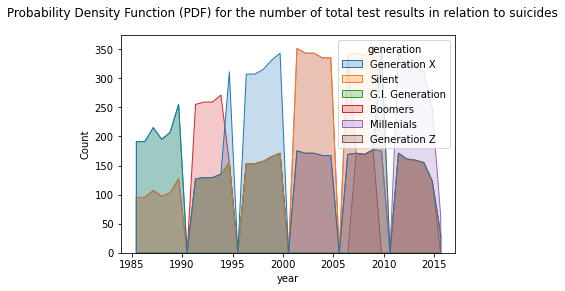

In [45]:
sns.histplot(df_masters, x=df_masters["year"], hue=df_masters["generation"], element="poly")
plt.suptitle("Probability Density Function (PDF) for the number of total test results in relation to suicides")
plt.show()

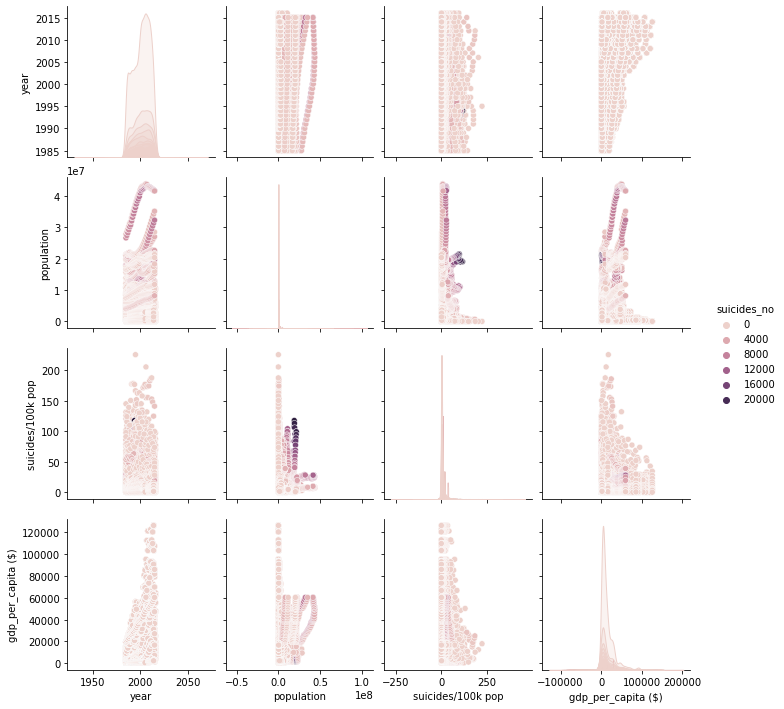

In [46]:
sns.pairplot(df_masters, hue='suicides_no')

---

## INSIGHTS:

* No matter which year it is, the suicides number of male are about three times higher than of female.

* The suicide rate is getting higher when the age is higher. That is, age is a factor of suicide.

* Before 2000, we can see that the highest suicide rate is 'G.I. generation',   
They suffered from the worldwide great depression before WW2, at this time, the income, profit, taxes are decreased seriously, so this generation experienced economic and social turmoil.

* Interestingly, the suicide rate of Generation X and Millenials increase step by step. 

* the suicide rate increases rapidly once the average age of generation is over 20. 
Does it mean that the suicide rate of young persons rise when they are independent of their parents? 
In other words, healthy family is helpful to the suicide rate.

* According to the suicide rate of each level of age, the rate of elderly is higher, so young people should care more about the elderly. Moreover, the country welfare of the elderly may also impact the rate.

* The social pressure. A healthy society can make citizens feel safe and satisfied, so how to relieve the social pressure becomes a significant topic for every country. Our purpose is not only reduce the suicide rate but also to build a better world.

---